#### Author: Mr. M.Belhaddad
#### 📂 Notebook Structure

#### ✅ Step 1: Data Wrangling
- Load dataset
- Check missing values & duplicates
- Validate data types
- Create new metrics:
  - CTR (Click-Through Rate)
  - CPC (Cost Per Click)
  - CPA (Cost Per Acquisition)
- Summary statistics & distributions

#### ✅ Step 2: Data Analysis (EDA)
- **Univariate analysis:** distributions of numeric features
- **Bivariate analysis:** CTR by age, gender, interest
- **Aggregations:** performance by campaign, age group, gender
- **Correlation analysis:** heatmap
- Visual insights with **Seaborn**/**Matplotlib**

#### ✅ Step 3: Insights & Recommendations
- High-performing segments
- Low-performing campaigns
- Cost efficiency (CPC, CPA)


In [746]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [747]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [748]:
df = pd.read_csv('data/conversion.csv')
df.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290,1,1


# 🕵️‍♂️ 1. Data Wrangling

### ✅ Step 1: Inspect Data

In [749]:
df.shape

(1143, 11)

In [750]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [751]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000
mean,987261.130,1067.382,133783.990,32.766,186732.133,33.390,51.361,2.856,0.944
std,193992.815,121.629,20500.309,26.952,312762.183,56.892,86.908,4.484,1.738
min,708746.000,916.000,103916.000,2.000,87.000,0.000,0.000,0.000,0.000
25%,777632.500,936.000,115716.000,16.000,6503.500,1.000,1.480,1.000,0.000
50%,1121185.000,1178.000,144549.000,25.000,51509.000,8.000,12.370,1.000,1.000
75%,1121804.500,1178.000,144657.500,31.000,221769.000,37.500,60.025,3.000,1.000
max,1314415.000,1178.000,179982.000,114.000,3052003.000,421.000,639.950,60.000,21.000


In [752]:
# Intrest is a categorical variable representing different interest categories (eg: sports, music, travel, etc.)
df['interest'] = df['interest'].astype('object')

### ✅ Step 2: Check for Missing & Duplicate Values

In [753]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [754]:
df.duplicated().sum()

0

### ✅ Step 3: Data Distribution & Summary

C:\Users\PC-MOH\AppData\Local\Temp\ipykernel_34572\981435383.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


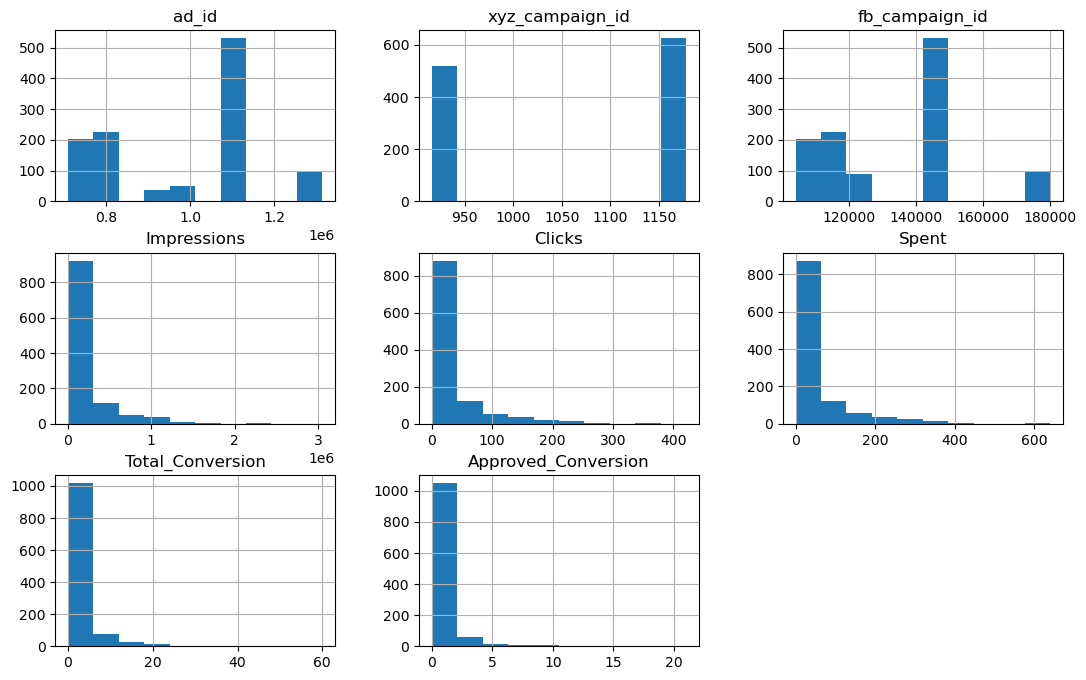

In [755]:
fig, ax = plt.subplots(figsize=(13, 8))
df.hist(ax=ax)
plt.show()

In [756]:
df['age'].value_counts()

age
30-34    426
45-49    259
35-39    248
40-44    210
Name: count, dtype: int64

In [757]:
df['gender'].value_counts()

gender
M    592
F    551
Name: count, dtype: int64

In [758]:
df['interest'].value_counts().head(10)

interest
16    140
10     85
29     77
27     60
15     51
28     51
20     49
64     48
63     46
18     43
Name: count, dtype: int64

### ✅ Step 4: Create Derived Metrics

In [759]:
df['CPC'] = df['Spent'] / df['Clicks'].replace(0, np.nan)
df['CPC'] =df['CPC'].apply(lambda x: float("%.2f" % x))

In [760]:
df['CTR'] = df['Clicks'] / df['Impressions'].replace(0, np.nan) * 100
df['CTR'] = df['CTR'].apply(lambda x: float("%.4f" % x))

In [761]:
df['CPA'] = df['Spent'] / df['Approved_Conversion'].replace(0, np.nan)
df['CPA'] = df['CPA'].apply(lambda x: float("%.2f" % x))

In [762]:
df['CPM'] = df['Spent'] / df['Impressions'].replace(0, np.nan) * 1000
df['CPM'] = df['CPM'].apply(lambda x: float("%.2f" % x))

#### ✅ Step 4: Basic descriptive statistics

In [763]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   object 
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
 11  CPC                  936 non-null    float64
 12  CTR                  1143 non-null   float64
 13  CPA                  584 non-null    float64
 14  CPM                  1143 non-null   float64
dtypes: float64(5), int64(7), object(3)
mem

In [764]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPC,CTR,CPA,CPM
count,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,936.000,1143.000,584.000,1143.000
mean,987261.130,1067.382,133783.990,186732.133,33.390,51.361,2.856,0.944,1.499,0.016,40.553,0.239
std,193992.815,121.629,20500.309,312762.183,56.892,86.908,4.484,1.738,0.233,0.012,54.273,0.161
min,708746.000,916.000,103916.000,87.000,0.000,0.000,0.000,0.000,0.180,0.000,0.000,0.000
25%,777632.500,936.000,115716.000,6503.500,1.000,1.480,1.000,0.000,1.390,0.010,3.067,0.150
50%,1121185.000,1178.000,144549.000,51509.000,8.000,12.370,1.000,1.000,1.500,0.016,22.845,0.250
75%,1121804.500,1178.000,144657.500,221769.000,37.500,60.025,3.000,1.000,1.642,0.023,54.005,0.330
max,1314415.000,1178.000,179982.000,3052003.000,421.000,639.950,60.000,21.000,2.210,0.106,352.450,1.500


# 🔬 2. Data Analysis (EDA & Visualizations)

#### # --- 1. Distribution of Impressions ---

c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


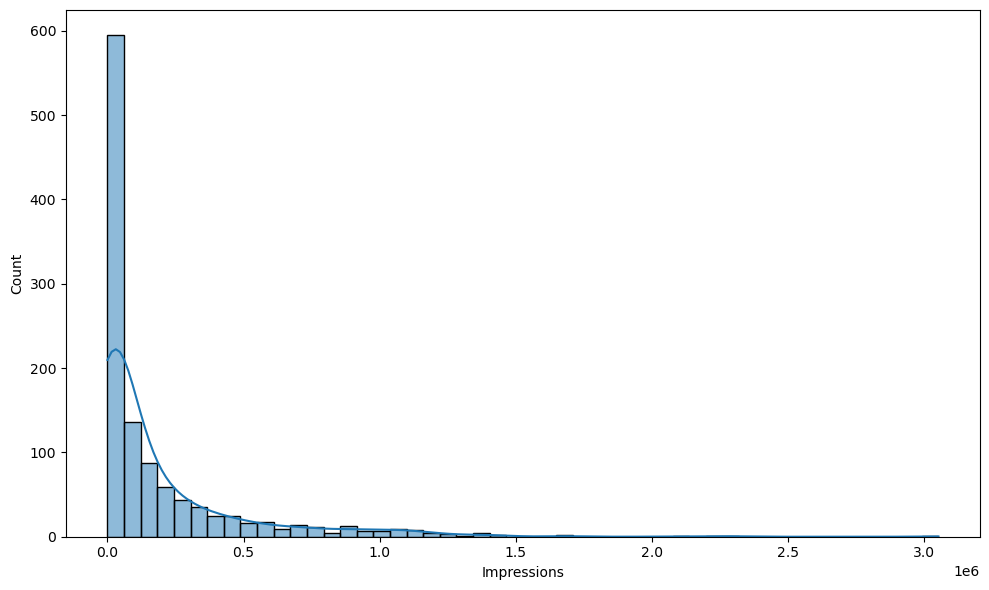

In [765]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(
  data=df,
  x='Impressions',
  bins=50,
  kde=True,      # Kernel Density Estimate
  ax=ax
)
plt.tight_layout()
plt.show()

#### # --- 2. Distribution of Clicks ---


c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


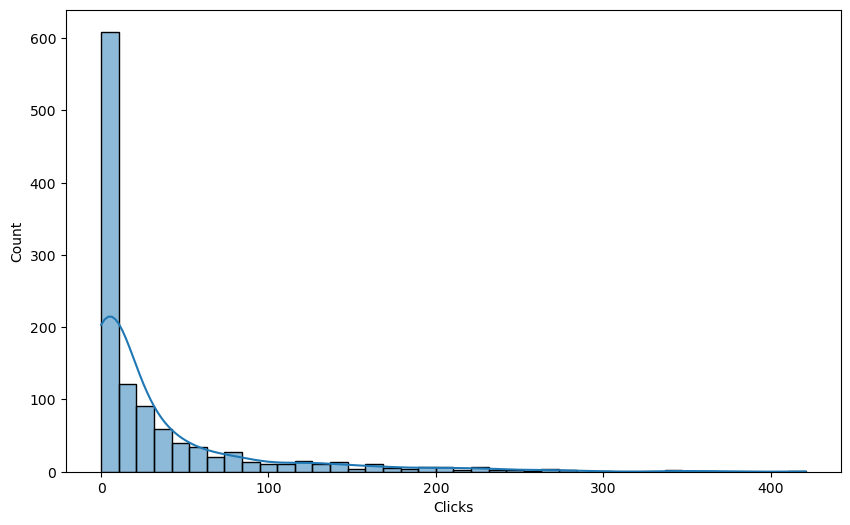

In [766]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(
  data=df,
  x='Clicks',
  bins=40,
  kde=True
)
plt.show()

#### # --- 3. CTR by Age Group ---

In [767]:
age_imp_click_df = df.groupby('age').agg({'Impressions':'sum','Clicks':'sum'}).reset_index()
age_imp_click_df

,age,Impressions,Clicks
0,30-34,67993019,9483
1,35-39,42104644,7094
2,40-44,39604307,7736
3,45-49,63732858,13852


In [768]:
df_ctr_age = df.groupby('age', as_index=False)['CTR'].sum().sort_values(by='CTR')
df_ctr_age

,age,CTR
1,35-39,4.031
2,40-44,4.210
0,30-34,4.952
3,45-49,5.575


c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


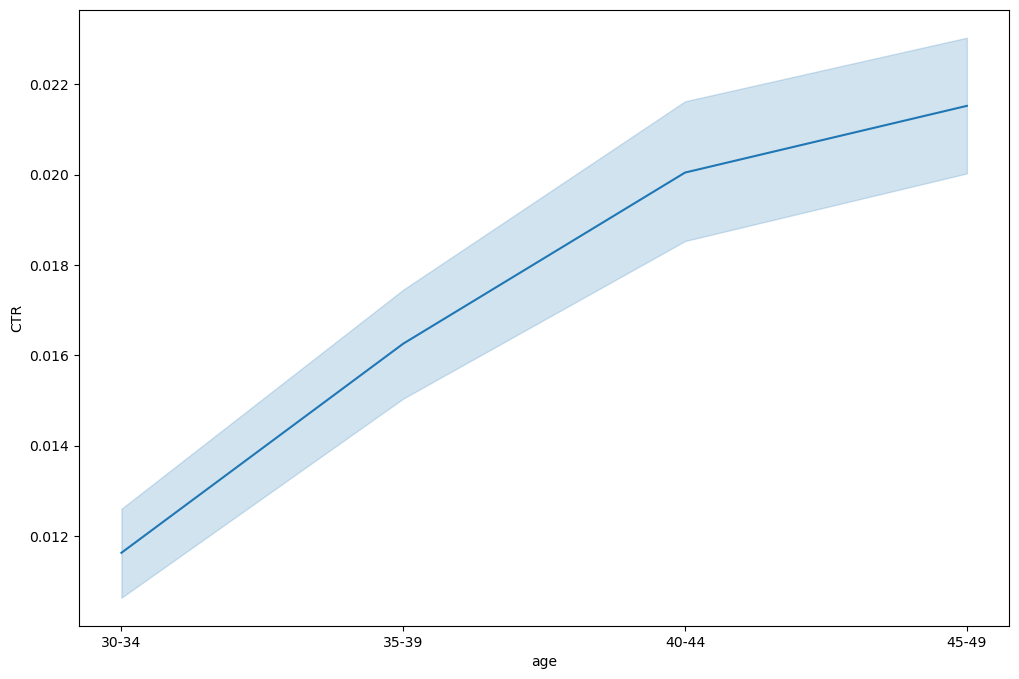

In [769]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(
  data=df,
  x='age',
  y='CTR',    # 'Mean' by default
  ax=ax
)
plt.show()

#### # --- 4. CTR by Gender ---


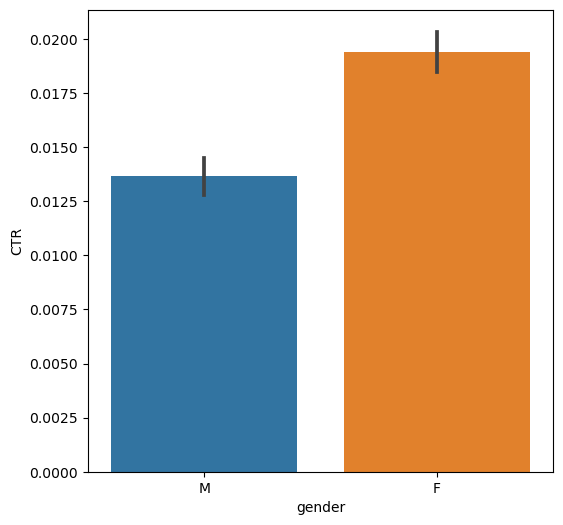

In [770]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(
  data=df,
  x='gender',
  y='CTR'
)
plt.show()

#### # --- 5. Spend vs Approved Conversions ---

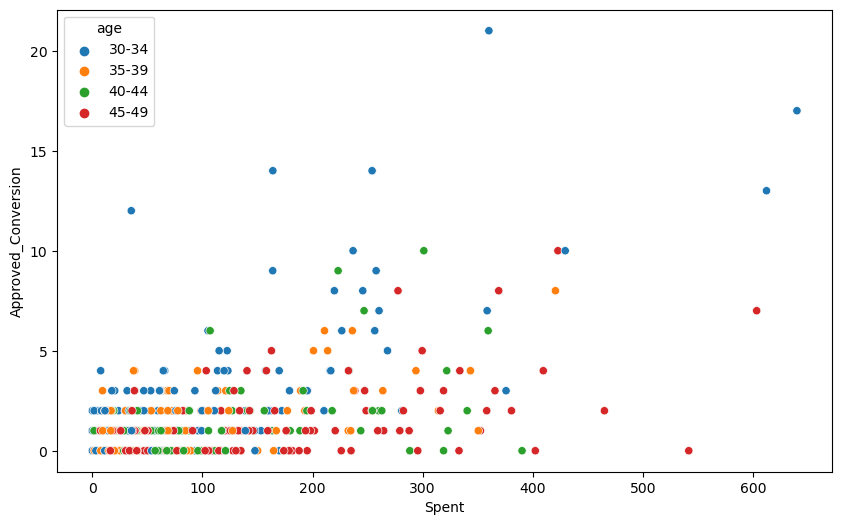

In [771]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
  data=df, 
  x='Spent',
  y='Approved_Conversion',
  hue='age',
  ax=ax
)
plt.show()

#### # --- 6. Correlation Heatmap ---

In [772]:
corr_matrix = df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion","CPC","CTR","CPA","CPM"]].corr()
corr_matrix

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPC,CTR,CPA,CPM
Impressions,1.000,0.949,0.970,0.813,0.684,0.208,0.076,0.587,0.133
Clicks,0.949,1.000,0.993,0.695,0.560,0.112,0.159,0.684,0.203
Spent,0.970,0.993,1.000,0.725,0.593,0.165,0.141,0.672,0.194
Total_Conversion,0.813,0.695,0.725,1.000,0.864,0.160,0.011,0.222,0.049
Approved_Conversion,0.684,0.560,0.593,0.864,1.000,0.170,-0.007,0.003,0.031
CPC,0.208,0.112,0.165,0.160,0.170,1.000,-0.379,0.102,-0.028
CTR,0.076,0.159,0.141,0.011,-0.007,-0.379,1.000,0.182,0.956
CPA,0.587,0.684,0.672,0.222,0.003,0.102,0.182,1.000,0.233
CPM,0.133,0.203,0.194,0.049,0.031,-0.028,0.956,0.233,1.000


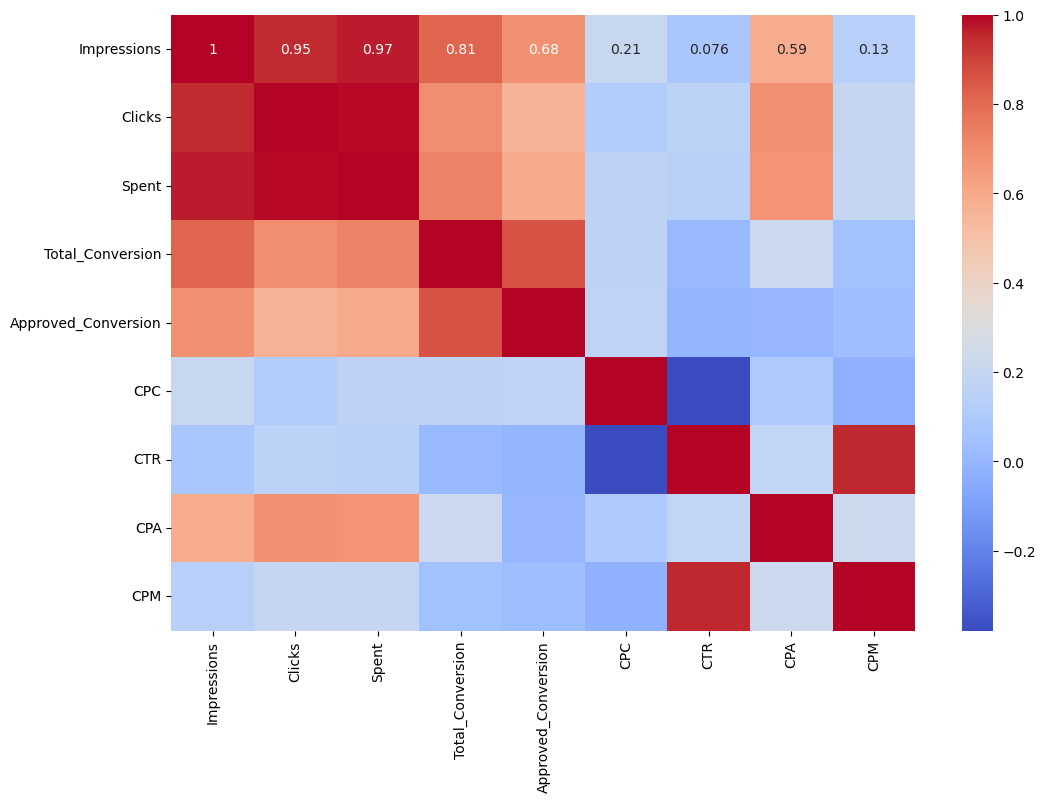

In [773]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
  data=corr_matrix,
  annot=True,
  cmap='coolwarm',
  ax=ax)
plt.show()

#### ✅ Optional: Group Analysis

In [774]:
# Performance by Age
age_group_df = df.groupby('age', as_index=False).agg({'Impressions': 'sum', 'Clicks': 'sum', 'Spent': 'sum', 'Approved_Conversion': 'sum'}) 
age_group_df['CTR'] = age_group_df['Clicks'] / age_group_df['Impressions'] * 100
age_group_df['CPA'] = age_group_df['Spent'] / age_group_df['Approved_Conversion']
age_group_df

,age,Impressions,Clicks,Spent,Approved_Conversion,CTR,CPA
0,30-34,67993019,9483,15252.400,494,0.014,30.875
1,35-39,42104644,7094,11112.430,207,0.017,53.683
2,40-44,39604307,7736,11589.730,170,0.020,68.175
3,45-49,63732858,13852,20750.670,208,0.022,99.763


c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


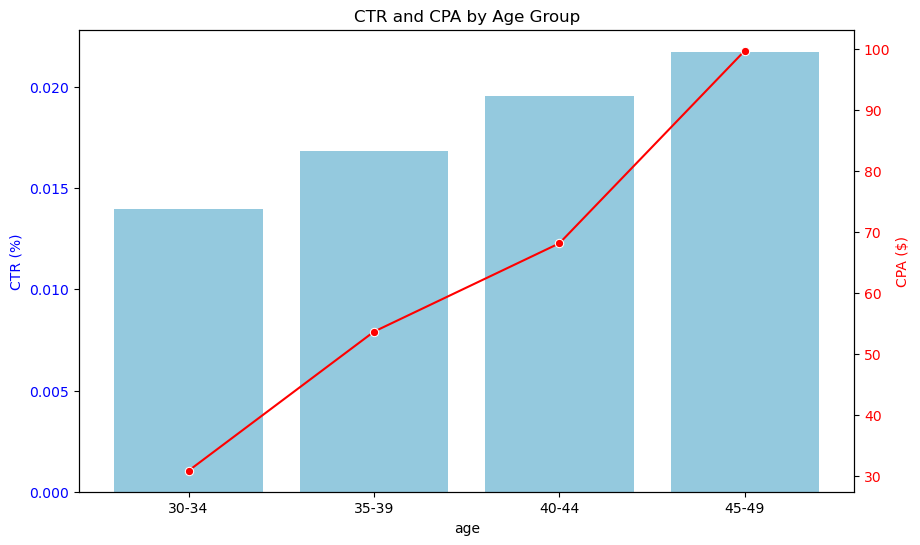

In [775]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for CTR (left axis)
sns.barplot(data=age_group_df, x='age', y='CTR', ax=ax1, color='skyblue')
ax1.set_ylabel('CTR (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second axis for CPA (right axis)
ax2 = ax1.twinx()

sns.lineplot(data=age_group_df, x='age', y='CPA', ax=ax2, color='red', marker='o')
ax2.set_ylabel('CPA ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('CTR and CPA by Age Group')
plt.show()

In [776]:
# Performance by Gender
gender_group_df = df.groupby('gender', as_index=False)[['Impressions', 'Clicks', 'Spent', 'Approved_Conversion']].sum()
gender_group_df['CTR'] = gender_group_df['Clicks'] / gender_group_df['Impressions'] * 100
gender_group_df['CPA'] = gender_group_df['Spent'] / gender_group_df['Approved_Conversion']
gender_group_df

,gender,Impressions,Clicks,Spent,Approved_Conversion,CTR,CPA
0,F,114862847,23878,34502.620,495,0.021,69.702
1,M,98571981,14287,24202.610,584,0.014,41.443


c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC-MOH\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


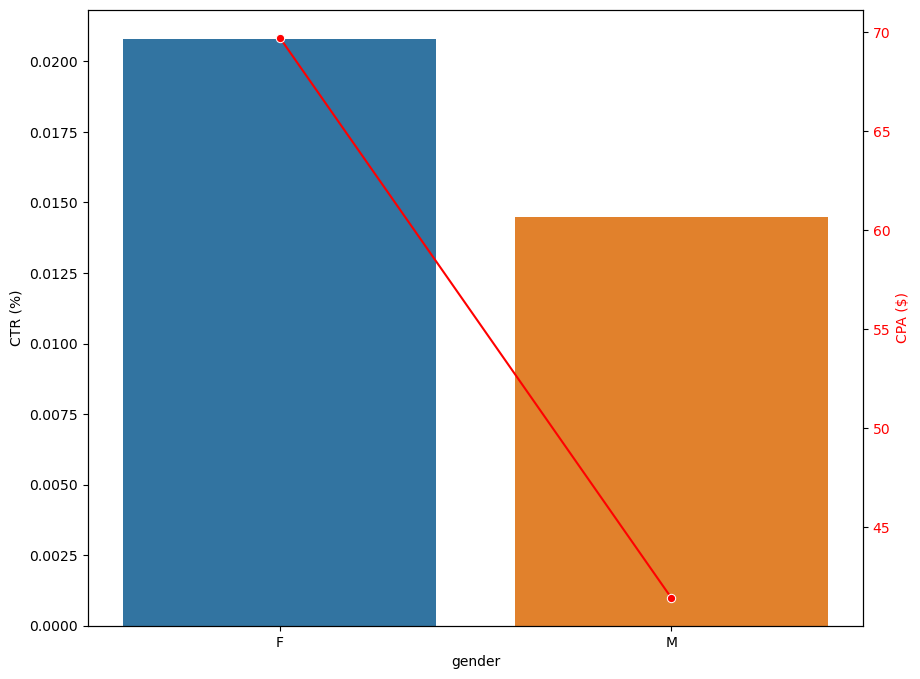

In [777]:
fig, ax1 = plt.subplots(figsize=(10, 8))
sns.barplot(data=gender_group_df, x='gender', y='CTR', ax=ax1)
ax1.set_ylabel('CTR (%)')
ax2 = ax1.twinx()
sns.lineplot(data=gender_group_df, x='gender', y='CPA', color='red', marker='o', ax=ax2)
ax2.set_ylabel('CPA ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.show()

#### ✅ Step 3: Insights & Recommendations

In [791]:
# 1. High-Performing Segments
# Sort by CTR (descending) and CPA (ascending)
high_perf = df.groupby(['age', 'gender']).agg({
    'Impressions':'sum',
    'Clicks':'sum',
    'Spent':'sum',
    'Approved_Conversion':'sum'
}).reset_index()

# Calculate metrics
high_perf['CTR'] = (high_perf['Clicks'] / high_perf['Impressions']) * 100
high_perf['CPC'] = high_perf['Spent'] / high_perf['Clicks'].replace(0, np.nan)
high_perf['CPA'] = high_perf['Spent'] / high_perf['Approved_Conversion'].replace(0, np.nan)

best_segments = high_perf.sort_values(by=['CPA', 'CTR'], ascending=[True, False])
best_segments

,age,gender,Impressions,Clicks,Spent,Approved_Conversion,CTR,CPC,CPA
1,30-34,M,36421443,4384,7640.920,299,0.012,1.743,25.555
0,30-34,F,31571576,5099,7611.480,195,0.016,1.493,39.033
3,35-39,M,20665139,2933,5051.080,112,0.014,1.722,45.099
5,40-44,M,16208132,2559,4193.150,77,0.016,1.639,54.456
2,35-39,F,21439505,4161,6061.350,95,0.019,1.457,63.804
7,45-49,M,25277267,4411,7317.460,96,0.017,1.659,76.224
4,40-44,F,23396175,5177,7396.580,93,0.022,1.429,79.533
6,45-49,F,38455591,9441,13433.210,112,0.025,1.423,119.939


In [796]:
print(df['CTR'].mean())
print(df['CPA'].mean())

0.016419160104986875
40.55284246575343


#### 🏷️ Segments with high CTR and low CPC/CPA are considered strong performers.
#### 🏷️ **(30-34 /	M):** are the Segment that has (CTR > average CTR) and (CPA < average CPA)

In [794]:
high_perf_campaign = df.groupby('xyz_campaign_id').agg({
    'Impressions':'sum',
    'Clicks':'sum',
    'Spent':'sum',
    'Approved_Conversion':'sum'
}).reset_index()
high_perf_campaign

# Calculate metrics
high_perf_campaign['CTR'] = (high_perf_campaign['Clicks'] / high_perf_campaign['Impressions']) * 100
high_perf_campaign['CPC'] = high_perf_campaign['Spent'] / high_perf_campaign['Clicks'].replace(0, np.nan)
high_perf_campaign['CPA'] = high_perf_campaign['Spent'] / high_perf_campaign['Approved_Conversion'].replace(0, np.nan)

high_perf_campaign.sort_values(by=['CPA'], ascending=[True])

,xyz_campaign_id,Impressions,Clicks,Spent,Approved_Conversion,CTR,CPC,CPA
0,916,482925,113,149.710,24,0.023,1.325,6.238
1,936,8128187,1984,2893.370,183,0.024,1.458,15.811
2,1178,204823716,36068,55662.150,872,0.018,1.543,63.833


In [795]:
print(df['CTR'].mean())
print(df['CPA'].mean())

0.016419160104986875
40.55284246575343


In [802]:
high_perf_campaign[(high_perf_campaign['CTR']>df['CTR'].mean()) & (high_perf_campaign['CPA']<df['CPA'].mean())]

,xyz_campaign_id,Impressions,Clicks,Spent,Approved_Conversion,CTR,CPC,CPA
0,916,482925,113,149.710,24,0.023,1.325,6.238
1,936,8128187,1984,2893.370,183,0.024,1.458,15.811


#### 🏷️ xyz_campaign_id=916 is the best campaign (has the lowest CPA)
#### 🏷️ xyz_campaign_id=1178 is the worst

# 😁💪 Recommendations

After running these test, We conclude that:
* 📌 Shift budget toward segments with high CTR and low CPA.  💡 **(30-34 /	M)**
* 📌 Reduce spend on segments with high CPA and low CTR.
* 📌 Consider interest-based targeting: Find top-performing interests and allocate more ads there.
* 📌 Test new creatives for low CTR segments before cutting them completely.